In [2]:
from google.colab import drive
drive.mount('/content/gdive')

Drive already mounted at /content/gdive; to attempt to forcibly remount, call drive.mount("/content/gdive", force_remount=True).


In [3]:
path = '/content/gdive/MyDrive/Machine Learning Sem3/Praktikum6'

In [4]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/calonpembelimobil.csv', sep=',')

# cetak header data (5 baris data) dari file
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [7]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]

# Kolom target (label)
y = df ['Beli_Mobil']

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100 :.2f}%")
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 93.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200




Confusion Matrix:
 [[ 55   9]
 [  5 131]]


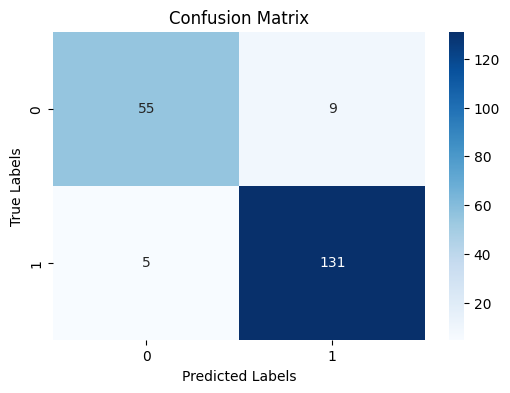

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred) )

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

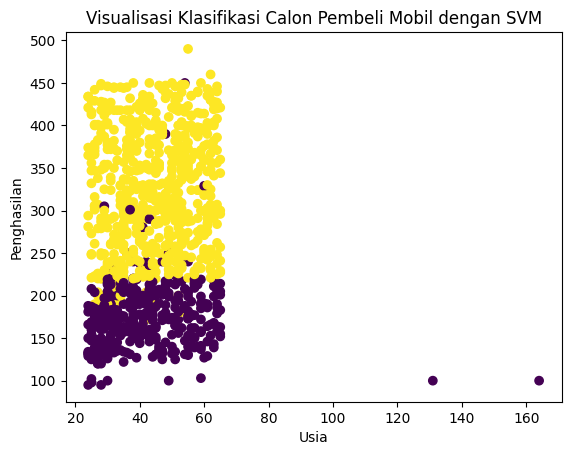

In [11]:
import matplotlib.pyplot as plt

# Visualisasi hubungan antara Usia dan Penghasilan, dengan warna menunjukkan Beli_Mobil
plt.scatter(df['Usia'], df['Penghasilan'], c=df['Beli_Mobil'])
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
plt.title('Visualisasi Klasifikasi Calon Pembeli Mobil dengan SVM')
plt.show()

In [12]:
Q1 = df['Usia'].quantile(0.25)
Q3 = df['Usia'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter data
df = df[(df['Usia'] >= lower) & (df['Usia'] <= upper)]

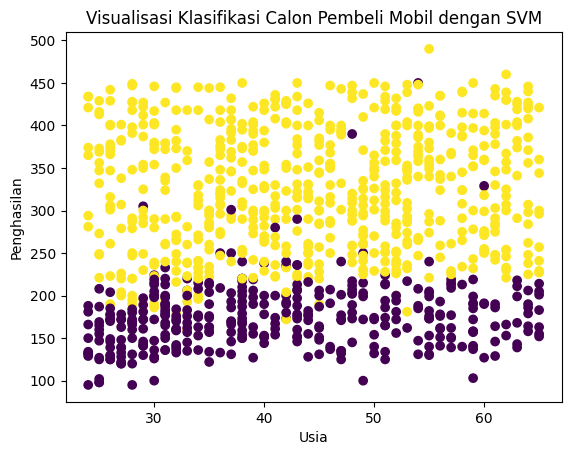

In [13]:
import matplotlib.pyplot as plt

# Visualisasi hubungan antara Usia dan Penghasilan, dengan warna menunjukkan Beli_Mobil
plt.scatter(df['Usia'], df['Penghasilan'], c=df['Beli_Mobil'])
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
plt.title('Visualisasi Klasifikasi Calon Pembeli Mobil dengan SVM')
plt.show()

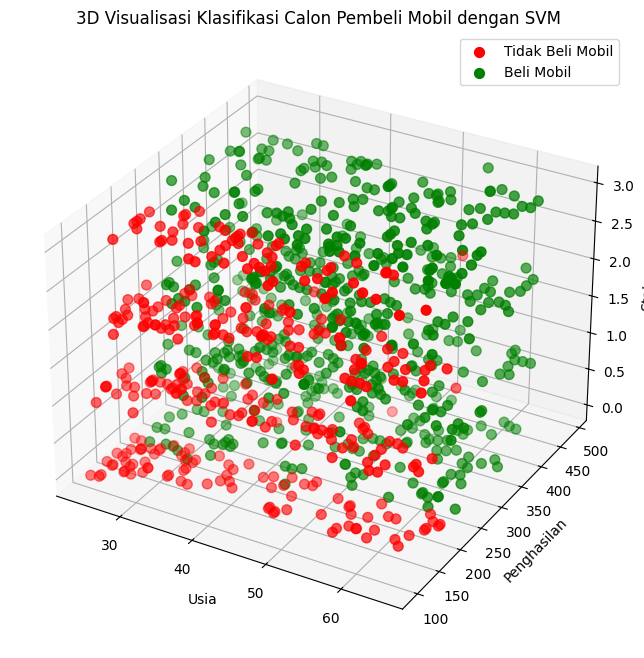

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Visualisasi 3D data calon pembeli mobil
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas (0 = tidak beli, 1 = beli)
colors = ['r', 'g']
labels = ['Tidak Beli Mobil', 'Beli Mobil']

# Plot tiap kelas dengan warna berbeda
for i, label in enumerate(labels):
    subset = df[df['Beli_Mobil'] == i]
    ax.scatter(
        subset['Usia'],
        subset['Penghasilan'],
        subset['Status'],
        color=colors[i],
        label=label,
        s=50
    )

ax.set_xlabel('Usia')
ax.set_ylabel('Penghasilan')
ax.set_zlabel('Status')
ax.set_title('3D Visualisasi Klasifikasi Calon Pembeli Mobil dengan SVM')
ax.legend()
plt.show()